In [4]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

N = 1000
mu = 1
Sigma = 1
# Define variables 
x,r,p,q,l, h,m,n,s = symbols('x r p q l h m n s')


In [5]:
#Fixation probability
def G(x,r,p,q,l, h) :
    return x*(1-x)*(((2*r-1)*(q-r)*(1+2*l))/((1+l)*(3+2*l))-((2*r-1)*(p-r)*(1+2*h))/((1+h)*(3+2*h))  + 2*(((1-x)*(q-r)**2)/(3+2*l) - (x*(p-r)**2)/(3+2*h) + ((2*x-1)*(q-r)*(p-r))/(3+l+h)+ r*(1-r)*(1/(3+2*l) - 1/(3+2*h))))

# show result
G(x,r,p,q,l, h)


x*(1 - x)*(2*r*(1 - r)*(1/(2*l + 3) - 1/(2*h + 3)) - 2*x*(p - r)**2/(2*h + 3) + 2*(1 - x)*(q - r)**2/(2*l + 3) + 2*(p - r)*(q - r)*(2*x - 1)/(h + l + 3) + (2*l + 1)*(q - r)*(2*r - 1)/((l + 1)*(2*l + 3)) - (2*h + 1)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)))

In [6]:
dG_dh = diff(G(x,r,p,q,l, h), h)
# Afficher le résultat
print(dG_dh)

x*(1 - x)*(4*r*(1 - r)/(2*h + 3)**2 + 4*x*(p - r)**2/(2*h + 3)**2 - 2*(p - r)*(q - r)*(2*x - 1)/(h + l + 3)**2 + 2*(2*h + 1)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) - 2*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)) + (2*h + 1)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3)))


In [7]:

def DG(x,r,p,q,l, h) :
    return x*(1 - x)*(4*r*(1 - r)/(2*h + 3)**2 + 4*x*(p - r)**2/(2*h + 3)**2 - 2*(p - r)*(q - r)*(2*x - 1)/(h + l + 3)**2 + 2*(2*h + 1)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) - 2*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)) + (2*h + 1)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3)))
DG(x,r,p,q,l, h)

x*(1 - x)*(4*r*(1 - r)/(2*h + 3)**2 + 4*x*(p - r)**2/(2*h + 3)**2 - (2*p - 2*r)*(q - r)*(2*x - 1)/(h + l + 3)**2 - (2*p - 2*r)*(2*r - 1)/((h + 1)*(2*h + 3)) + (4*h + 2)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) + (2*h + 1)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3)))

In [8]:
F=DG(0.01,r,p,p,h, h)
F

0.0396*r*(1 - r)/(2*h + 3)**2 + 0.000396*(p - r)**2/(2*h + 3)**2 + 0.009702*(p - r)*(2*p - 2*r)/(2*h + 3)**2 - 0.0099*(2*p - 2*r)*(2*r - 1)/((h + 1)*(2*h + 3)) + 0.0099*(4*h + 2)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) + 0.0099*(2*h + 1)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3))

In [9]:
# Définir l'équation
E = 0.0396*r*(1 - r)/(2*h + 3)**2 - 0.0198*(p - r)*(0.98*r - 0.49)/(h + h + 3)**2 + 0.000396*(p - r)**2/(2*h + 3)**2 + 0.0198*(2*h + 1)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) - 0.0198*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3))+ 0.0099*(2*h + 1)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3))
equationE =F
# Résoudre l'équation
solutionsE = solve(equationE, h)

# Afficher les solutions
solutionsE
E

0.0396*r*(1 - r)/(2*h + 3)**2 + (0.0198*h + 0.0099)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3)) + (0.0396*h + 0.0198)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) - (0.0198*p - 0.0198*r)*(0.98*r - 0.49)/(2*h + 3)**2 + 0.000396*(p - r)**2/(2*h + 3)**2 - (0.0198*p - 0.0198*r)*(2*r - 1)/((h + 1)*(2*h + 3))

/tmp/ipykernel_6274/2014804876.py:3: RuntimeWarning: invalid value encountered in sqrt
  return (-2.0*p**2 - 98.0*p*r + 51.0*p + 300.0*r**2 - 251.0*r - 412.431812546026*np.sqrt(0.00117577895355673*p**3*r - 0.000587889476778366*p**3 + 0.409171075837742*p**2*r**2 - 0.410934744268078*p**2*r + 0.103174603174603*p**2 - 0.939447383891828*p*r**3 + p*r**2 - 0.265138154027043*p*r + 0.529100529100529*r**4 - 0.588477366255144*r**3 + 0.16196355085244*r**2))/(2.0*p**2 + 298.0*p*r - 151.0*p - 500.0*r**2 + 351.0*r)
/tmp/ipykernel_6274/2014804876.py:3: RuntimeWarning: invalid value encountered in true_divide
  return (-2.0*p**2 - 98.0*p*r + 51.0*p + 300.0*r**2 - 251.0*r - 412.431812546026*np.sqrt(0.00117577895355673*p**3*r - 0.000587889476778366*p**3 + 0.409171075837742*p**2*r**2 - 0.410934744268078*p**2*r + 0.103174603174603*p**2 - 0.939447383891828*p*r**3 + p*r**2 - 0.265138154027043*p*r + 0.529100529100529*r**4 - 0.588477366255144*r**3 + 0.16196355085244*r**2))/(2.0*p**2 + 298.0*p*r - 151.0*p - 500

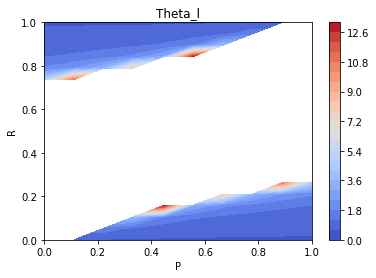

In [10]:

# Fonction à tracer first solution
def f(p, r):
    return (-2.0*p**2 - 98.0*p*r + 51.0*p + 300.0*r**2 - 251.0*r - 412.431812546026*np.sqrt(0.00117577895355673*p**3*r - 0.000587889476778366*p**3 + 0.409171075837742*p**2*r**2 - 0.410934744268078*p**2*r + 0.103174603174603*p**2 - 0.939447383891828*p*r**3 + p*r**2 - 0.265138154027043*p*r + 0.529100529100529*r**4 - 0.588477366255144*r**3 + 0.16196355085244*r**2))/(2.0*p**2 + 298.0*p*r - 151.0*p - 500.0*r**2 + 351.0*r)

# Plage de valeurs pour les variables h et l
P_vals = np.linspace(0, 1, 10)
R_vals = np.linspace(0, 1, 20)

# Création d'une grille pour les valeurs de h et l
P_grid1, R_grid1 = np.meshgrid(P_vals, R_vals)

# Calcul de la fonction f pour chaque paire (h, l) dans la grille
f_grid1 = f(P_grid1, R_grid1)
f_grid_POS1 = np.ma.masked_less_equal(f_grid1, 0)


# Tracé de la fonction en utilisant une carte de couleurs
plt.contourf(P_grid1, R_grid1, f_grid_POS1, levels=20, cmap='coolwarm')
plt.colorbar()
plt.xlabel('P')
plt.ylabel('R')
plt.title('Theta_l')
plt.show()

In [11]:
# x = 0.01 , q= r equal to 0, 0.05, 0.1, 0.15, ..., 1,   p  in 0, 0.1, 0.2, 0.3 ,... 1

p, r = symbols('p r')
def f(p, r):
    return  0.0198000000000000*(r - 1)*r*(1/(2*h + 3) - 1/(2*l + 3)) - 0.000198000000000000*(p - r)**2/(2*h + 3) - 0.00990000000000000*(2*h + 1)*(p - r)*(2*r - 1)/((2*h + 3)*(h + 1))



In [12]:
g = 0.0198000000000000*(r - 1)*r*(1/(2*h + 3) - 1/(2*l + 3)) - 0.000198000000000000*(p - r)**2/(2*h + 3) - 0.00990000000000000*(2*h + 1)*(p - r)*(2*r - 1)/((2*h + 3)*(h + 1))

dg_dh = diff(g, h)

print(dg_dh)

-2*r*(0.0198*r - 0.0198)/(2*h + 3)**2 + 2*(0.0198*h + 0.0099)*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3)**2) + (0.0198*h + 0.0099)*(p - r)*(2*r - 1)/((h + 1)**2*(2*h + 3)) + 0.000396*(p - r)**2/(2*h + 3)**2 - 0.0198*(p - r)*(2*r - 1)/((h + 1)*(2*h + 3))


In [13]:
# Définir l'équation
equationg =dg_dh
# Résoudre l'équation
solutionsg = solve(equationg, h)

# Afficher les solutions
print(solutionsg)

[(-p**2 - 98.0*p*r + 50.0*p + 199.0*r**2 - 150.0*r - 217.772817403826*sqrt(0.00105429625724829*p**3*r - 0.000527148128624143*p**3 + 0.41855561412757*p**2*r**2 - 0.420137058513442*p**2*r + 0.105429625724829*p**2 - 0.945703742751713*p*r**3 + p*r**2 - 0.263574064312072*p*r + 0.526093832366895*r**4 - 0.579335793357934*r**3 + 0.158144438587243*r**2))/(p**2 + 198.0*p*r - 100.0*p - 299.0*r**2 + 200.0*r), (-p**2 - 98.0*p*r + 50.0*p + 199.0*r**2 - 150.0*r + 217.772817403826*sqrt(0.00105429625724829*p**3*r - 0.000527148128624143*p**3 + 0.41855561412757*p**2*r**2 - 0.420137058513442*p**2*r + 0.105429625724829*p**2 - 0.945703742751713*p*r**3 + p*r**2 - 0.263574064312072*p*r + 0.526093832366895*r**4 - 0.579335793357934*r**3 + 0.158144438587243*r**2))/(p**2 + 198.0*p*r - 100.0*p - 299.0*r**2 + 200.0*r)]


/tmp/ipykernel_6274/3649565050.py:5: RuntimeWarning: invalid value encountered in sqrt
  return (-p**2 - 98.0*p*r + 50.0*p + 199.0*r**2 - 150.0*r - 217.772817403826*np.sqrt(0.00105429625724829*p**3*r - 0.000527148128624143*p**3 + 0.41855561412757*p**2*r**2 - 0.420137058513442*p**2*r + 0.105429625724829*p**2 - 0.945703742751713*p*r**3 + p*r**2 - 0.263574064312072*p*r + 0.526093832366895*r**4 - 0.579335793357934*r**3 + 0.158144438587243*r**2)) / (p**2 + 198.0*p*r - 100.0*p - 299.0*r**2 + 200.0*r)
/tmp/ipykernel_6274/3649565050.py:5: RuntimeWarning: divide by zero encountered in true_divide
  return (-p**2 - 98.0*p*r + 50.0*p + 199.0*r**2 - 150.0*r - 217.772817403826*np.sqrt(0.00105429625724829*p**3*r - 0.000527148128624143*p**3 + 0.41855561412757*p**2*r**2 - 0.420137058513442*p**2*r + 0.105429625724829*p**2 - 0.945703742751713*p*r**3 + p*r**2 - 0.263574064312072*p*r + 0.526093832366895*r**4 - 0.579335793357934*r**3 + 0.158144438587243*r**2)) / (p**2 + 198.0*p*r - 100.0*p - 299.0*r**2 + 2

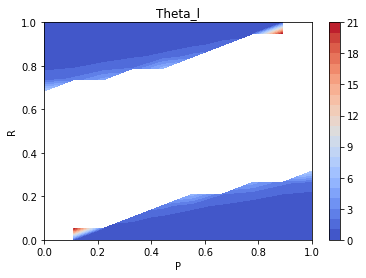

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def f(p, r):
    return (-p**2 - 98.0*p*r + 50.0*p + 199.0*r**2 - 150.0*r - 217.772817403826*np.sqrt(0.00105429625724829*p**3*r - 0.000527148128624143*p**3 + 0.41855561412757*p**2*r**2 - 0.420137058513442*p**2*r + 0.105429625724829*p**2 - 0.945703742751713*p*r**3 + p*r**2 - 0.263574064312072*p*r + 0.526093832366895*r**4 - 0.579335793357934*r**3 + 0.158144438587243*r**2)) / (p**2 + 198.0*p*r - 100.0*p - 299.0*r**2 + 200.0*r)


# Plage de valeurs pour les variables h et l
P_vals = np.linspace(0, 1, 10)
R_vals = np.linspace(0, 1, 20)

# Création d'une grille pour les valeurs de h et l
P_grid, R_grid = np.meshgrid(P_vals, R_vals)

# Calcul de la fonction f pour chaque paire (h, l) dans la grille
f_grid = f(P_grid, R_grid)
f_grid_POS = np.ma.masked_less_equal(f_grid, 0)


# Tracé de la fonction en utilisant une carte de couleurs
plt.contourf(P_grid, R_grid, f_grid_POS, levels=20, cmap='coolwarm')
plt.colorbar()
plt.xlabel('P')
plt.ylabel('R')
plt.title('Theta_l')
plt.show()

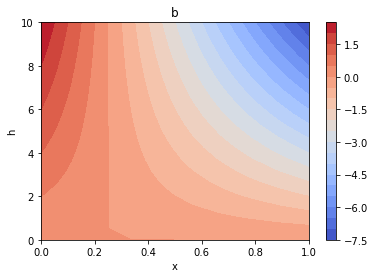

In [15]:

import numpy as np
import matplotlib.pyplot as plt



def g(x,s,h,r):
    return  2*s**2*x*(1-x)*(1-2*x)+h*(1-r)*(1-x)-h*x*r
# Fonction à tracer first solution
def fa(x, h):
    return g(x,0.1,h,0.75)
# Plage de valeurs pour les variables h et l
x_vals = np.linspace(0, 1, 10)
h_vals = np.linspace(0, 10, 20)

# Création d'une grille pour les valeurs de h et l
x_grid, h_grid = np.meshgrid(x_vals, h_vals)

# Calcul de la fonction f pour chaque paire (h, l) dans la grille
fa_grid = fa(x_grid, h_grid)
#fa_grid_POS = np.ma.masked_less_equal(f_grid, 0)


# Tracé de la fonction en utilisant une carte de couleurs
plt.contourf(x_grid, h_grid, fa_grid, levels=20, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('h')
plt.title('b')
plt.show()

In [16]:
from sympy import symbols, nsolve

# Déclaration des variables symboliques
s, x, h, r = symbols('s x h r')

# Définition de l'équation
equation = g(x,0.1,0,0.5)
# Résolution de l'équation
solutions = nsolve(equation, x,0)

# Filtrage des solutions en conservant uniquement celles qui satisfont h > 0
#solutions_filtered = [sol for sol in solutions if h > 0]

# Affichage des solutions
solutions


0

In [17]:
h_values = np.linspace(0, 10, 100)

#r=0.1
DataPointsDomainh1 = [0,0.1,0.2,1]
DataPointsRangex1 =  [0,0.884270055205874,0.892467016257308,0.898546731179614]


#r=0.5
DataPointsDomainh2 = [0,0.1,0.2,1]
DataPointsRangex2 =  [0,0.5,0.5,0.5]


#r=0.75
DataPointsDomainh3 = [0,0.01,0.02,0.1,0.2,1,10,15,20]
DataPointsRangex3 =  [1,0.370673988747924,0.32635182233307,0.268198106681628,0.259246748415128,0.251870219780548,0.250187453031353,0.250124979138909,0.250093738269538]


#r=0.85
DataPointsDomainh4 = [0,0.01,0.02,0.1,0.2,1]
DataPointsRangex4=  [0,0.311632588980728,0.244402354450922,0.168580862183512,0.159122045419917,0.151793293642916]


#r=0.9
DataPointsDomainh5 = [0,0.01,0.02,0.1,0.2,1]
DataPointsRangex5 =  [0,0.278167353930166,0.195800105659092,0.115729944794126,0.107532983742692,0.101453268820386]

In [18]:
#r=0.5
XHm5 = G(0.01, 0.5, m,m, l, h)

dXHm5_dh = diff(XHm5, h)
# Afficher le résultat
print(dXHm5_dh)

-0.0198*(0.49 - 0.98*m)*(m - 0.5)/(h + l + 3)**2 + 0.000396*(m - 0.5)**2/(2*h + 3)**2 + 0.0099/(2*h + 3)**2


In [19]:
def DXHm5_dh(h,l):
    return -0.0198*(0.49 - 0.98*m)*(m - 0.5)/(h + l + 3)**2 + 0.000396*(m - 0.5)**2/(2*h + 3)**2 + 0.0099/(2*h + 3)**2

dfm5 = DXHm5_dh(l,l)
print(dfm5)

(0.019404*m - 0.009702)*(m - 0.5)/(2*l + 3)**2 + 0.000396*(m - 0.5)**2/(2*l + 3)**2 + 0.0099/(2*l + 3)**2


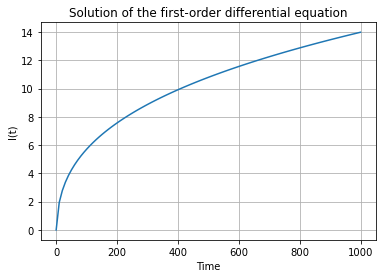

In [20]:
# Define the differential equation #r=0.5
def equation(l, t):
    m=np.interp(l, DataPointsDomainh2, DataPointsRangex2, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N* ((0.019404*m - 0.009702)*(m - 0.5)/(2*l + 3)**2 + 0.000396*(m - 0.5)**2/(2*l + 3)**2 + 0.0099/(2*l + 3)**2)
    return dldt

# Define the initial condition
l0 = 0

# Define the time points for the solution
t = np.linspace(0, 1000, 100)

# Solve the differential equation
sol51 = odeint(equation, l0, t)

# Plot the solution
plt.plot(t, sol51)
plt.xlabel('Time')
plt.ylabel('l(t)')
plt.title('Solution of the first-order differential equation')
plt.grid(True)
plt.show()

In [21]:
#r=0.75
XHm75 = G(0.01, 0.75, m,m, l, h)

dXHm75_dh = diff(XHm75, h)
# Afficher le résultat
print(dXHm75_dh)

-0.0198*(0.735 - 0.98*m)*(m - 0.75)/(h + l + 3)**2 + 0.000396*(m - 0.75)**2/(2*h + 3)**2 + 0.007425/(2*h + 3)**2 + 0.0198*(2*h + 1)*(0.5*m - 0.375)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.5*m - 0.375)/((h + 1)*(2*h + 3)) + 0.0099*(2*h + 1)*(0.5*m - 0.375)/((h + 1)**2*(2*h + 3))


In [22]:
def DXHm75_dh(h,l):
    return -0.0198*(0.735 - 0.98*m)*(m - 0.75)/(h + l + 3)**2 + 0.000396*(m - 0.75)**2/(2*h + 3)**2 + 0.007425/(2*h + 3)**2 + 0.0198*(2*h + 1)*(0.5*m - 0.375)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.5*m - 0.375)/((h + 1)*(2*h + 3)) + 0.0099*(2*h + 1)*(0.5*m - 0.375)/((h + 1)**2*(2*h + 3))

dfm75 = DXHm75_dh(l,l)
print(dfm75)

(0.0198*l + 0.0099)*(0.5*m - 0.375)/((l + 1)**2*(2*l + 3)) + (0.0396*l + 0.0198)*(0.5*m - 0.375)/((l + 1)*(2*l + 3)**2) + (0.019404*m - 0.014553)*(m - 0.75)/(2*l + 3)**2 + 0.000396*(m - 0.75)**2/(2*l + 3)**2 + 0.007425/(2*l + 3)**2 - (0.0099*m - 0.007425)/((l + 1)*(2*l + 3))


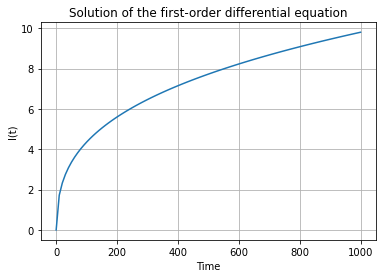

In [23]:
# Define the differential equation #r=0.75
def equation(l, t):
    m=np.interp(l, DataPointsDomainh3, DataPointsRangex3, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N* ((0.0198*l + 0.0099)*(0.5*m - 0.375)/((l + 1)**2*(2*l + 3)) + (0.0396*l + 0.0198)*(0.5*m - 0.375)/((l + 1)*(2*l + 3)**2) + (0.019404*m - 0.014553)*(m - 0.75)/(2*l + 3)**2 + 0.000396*(m - 0.75)**2/(2*l + 3)**2 + 0.007425/(2*l + 3)**2 - (0.0099*m - 0.007425)/((l + 1)*(2*l + 3)))
    return dldt

# Define the initial condition
l0 = 0

# Define the time points for the solution
t = np.linspace(0, 1000, 100)

# Solve the differential equation
sol71 = odeint(equation, l0, t)

# Plot the solution
plt.plot(t, sol71)
plt.xlabel('Time')
plt.ylabel('l(t)')
plt.title('Solution of the first-order differential equation')
plt.grid(True)
plt.show()

In [24]:

 #r=0.85
XHm85 = G(0.01, 0.85, m,m, l, h)

dXHm85_dh = diff(XHm85, h)
# Afficher le résultat
print(dXHm85_dh)

-0.0198*(0.833 - 0.98*m)*(m - 0.85)/(h + l + 3)**2 + 0.000396*(m - 0.85)**2/(2*h + 3)**2 + 0.005049/(2*h + 3)**2 + 0.0198*(2*h + 1)*(0.7*m - 0.595)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.7*m - 0.595)/((h + 1)*(2*h + 3)) + 0.0099*(2*h + 1)*(0.7*m - 0.595)/((h + 1)**2*(2*h + 3))


In [25]:
def DXHm85_dh(h,l):
    return -0.0198*(0.833 - 0.98*m)*(m - 0.85)/(h + l + 3)**2 + 0.000396*(m - 0.85)**2/(2*h + 3)**2 + 0.005049/(2*h + 3)**2 + 0.0198*(2*h + 1)*(0.7*m - 0.595)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.7*m - 0.595)/((h + 1)*(2*h + 3)) + 0.0099*(2*h + 1)*(0.7*m - 0.595)/((h + 1)**2*(2*h + 3))

dfm85 = DXHm85_dh(l,l)
print(dfm85)

(0.0198*l + 0.0099)*(0.7*m - 0.595)/((l + 1)**2*(2*l + 3)) + (0.0396*l + 0.0198)*(0.7*m - 0.595)/((l + 1)*(2*l + 3)**2) + (0.019404*m - 0.0164934)*(m - 0.85)/(2*l + 3)**2 + 0.000396*(m - 0.85)**2/(2*l + 3)**2 + 0.005049/(2*l + 3)**2 - (0.01386*m - 0.011781)/((l + 1)*(2*l + 3))


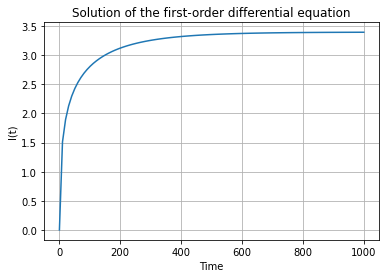

In [26]:

# Define the differential equation  #r=0.85
def equation(l, t):
    m=np.interp(l, DataPointsDomainh4, DataPointsRangex4, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N* ((0.0198*l + 0.0099)*(0.7*m - 0.595)/((l + 1)**2*(2*l + 3)) + (0.0396*l + 0.0198)*(0.7*m - 0.595)/((l + 1)*(2*l + 3)**2) + (0.019404*m - 0.0164934)*(m - 0.85)/(2*l + 3)**2 + 0.000396*(m - 0.85)**2/(2*l + 3)**2 + 0.005049/(2*l + 3)**2 - (0.01386*m - 0.011781)/((l + 1)*(2*l + 3)))
    return dldt

# Define the initial condition
l0 = 0

# Define the time points for the solution
t = np.linspace(0, 1000, 100)

# Solve the differential equation
sol81 = odeint(equation, l0, t)

# Plot the solution
plt.plot(t, sol81)
plt.xlabel('Time')
plt.ylabel('l(t)')
plt.title('Solution of the first-order differential equation')
plt.grid(True)
plt.show()

In [27]:
t = np.linspace(0, 200, 100)


# Tracé des fonctions

plt.plot(t, sol91, label='$r=0.9$', color='red')
plt.plot(t, sol81, label='$r=0.85$', color='green')
plt.plot(t, sol71, label='$r=0.75$', color='blue')
plt.plot(t, sol51, label='$r=0.50$')

# Légendes et titre
plt.legend()
plt.xlabel('t')
plt.ylabel('l')
plt.title('Mutation rate evolution')

# Afficher le graphique
plt.grid(True)
plt.savefig("Different R.pdf")
plt.show()


NameError: name 'sol91' is not defined

In [54]:
XHm = G(0.01, 0.9, m,m, l, h)
XHm

0.0198*(0.882 - 0.98*m)*(m - 0.9)/(h + l + 3) + 0.019602*(m - 0.9)**2/(2*l + 3) + 0.001782/(2*l + 3) + 0.0099*(2*l + 1)*(0.8*m - 0.72)/((l + 1)*(2*l + 3)) - 0.000198*(m - 0.9)**2/(2*h + 3) - 0.001782/(2*h + 3) - 0.0099*(2*h + 1)*(0.8*m - 0.72)/((h + 1)*(2*h + 3))

In [56]:
dXHm_dh = diff(XHm, h)
# Afficher le résultat
print(dXHm_dh)

-0.0198*(0.882 - 0.98*m)*(m - 0.9)/(h + l + 3)**2 + 0.000396*(m - 0.9)**2/(2*h + 3)**2 + 0.003564/(2*h + 3)**2 + 0.0198*(2*h + 1)*(0.8*m - 0.72)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.8*m - 0.72)/((h + 1)*(2*h + 3)) + 0.0099*(2*h + 1)*(0.8*m - 0.72)/((h + 1)**2*(2*h + 3))


In [58]:
def DXHm_dh(h,l):
    return -0.0198*(0.882 - 0.98*m)*(m - 0.9)/(h + l + 3)**2 + 0.000396*(m - 0.9)**2/(2*h + 3)**2 + 0.003564/(2*h + 3)**2 + 0.0198*(2*h + 1)*(0.8*m - 0.72)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.8*m - 0.72)/((h + 1)*(2*h + 3)) + 0.0099*(2*h + 1)*(0.8*m - 0.72)/((h + 1)**2*(2*h + 3)) 
dfm = DXHm_dh(l,l)
print(dfm)

(0.0198*l + 0.0099)*(0.8*m - 0.72)/((l + 1)**2*(2*l + 3)) + (0.0396*l + 0.0198)*(0.8*m - 0.72)/((l + 1)*(2*l + 3)**2) + (0.019404*m - 0.0174636)*(m - 0.9)/(2*l + 3)**2 + 0.000396*(m - 0.9)**2/(2*l + 3)**2 + 0.003564/(2*l + 3)**2 - (0.01584*m - 0.014256)/((l + 1)*(2*l + 3))


In [60]:

# Define the differential equation
def equation(l, t):
    m=np.interp(l, DataPointsDomainh5, DataPointsRangex5, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N* ((0.0198*l + 0.0099)*(0.8*m - 0.72)/((l + 1)**2*(2*l + 3)) + (0.0396*l + 0.0198)*(0.8*m - 0.72)/((l + 1)*(2*l + 3)**2) + (0.019404*m - 0.0174636)*(m - 0.9)/(2*l + 3)**2 + 0.000396*(m - 0.9)**2/(2*l + 3)**2 + 0.003564/(2*l + 3)**2 - (0.01584*m - 0.014256)/((l + 1)*(2*l + 3)))
    return dldt

# Define the initial condition
l91 = 0
l92 = 3
l93 = 5
# Define the time points for the solution
t = np.linspace(0, 400, 100)

# Solve the differential equation
sol91 = odeint(equation, l91, t)
sol92 = odeint(equation, l92, t)
sol93 = odeint(equation, l93, t)



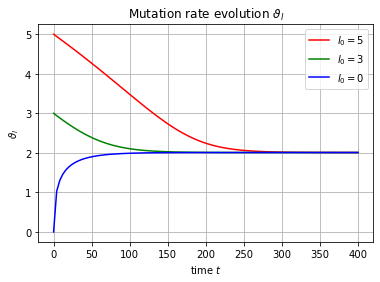

In [62]:


t = np.linspace(0, 400, 100)


# Tracé des fonctions

plt.plot(t, sol93, label='$l_0=5$', color='red')
plt.plot(t, sol92, label='$l_0=3$', color='green')
plt.plot(t, sol91, label='$l_0=0$', color='blue')

# Légendes et titre
plt.legend()
plt.xlabel(r'time $t$')
plt.ylabel(r'$\vartheta_l$')
plt.title(r'Mutation rate evolution $\vartheta_l$')

# Afficher le graphique
plt.grid(True)
plt.savefig("Different l_0 equilibrium.pdf")
plt.show()


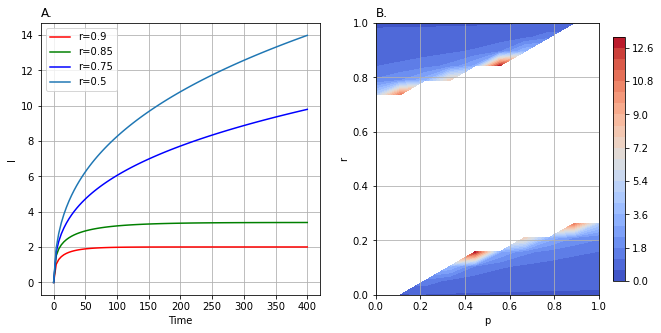

In [63]:
fig,(ax1,ax3) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)
#ax2 = ax1.twinx()

ax1.plot(t, sol91, label='$r=0.9$', color='red')
ax1.plot(t, sol81, label='$r=0.85$', color='green')
ax1.plot(t, sol71, label='$r=0.75$', color='blue')
ax1.plot(t, sol51, label='$r=0.50$')

A=ax3.contourf(P_grid1, R_grid1, f_grid_POS1, levels=20, cmap='coolwarm')
fig.colorbar(A, ax=ax3, shrink=0.9)
#.plot(t, sol2, label='$r=0.9$', color='blue')
ax1.legend(['r=0.9','r=0.85','r=0.75','r=0.5'])

ax3.set_xlabel('p')
ax3.set_ylabel('r', color='black')

ax1.set_xlabel('Time')
ax1.set_ylabel('l', color='black')

ax1.set_title('A.',loc='left') 
ax3.set_title('B.',loc='left') 
#ax4.set_yl
#ax3.legend(['r=0.9'])
ax1.grid(True)
ax3.grid(True)
plt.savefig("Different r normal.pdf")

In [66]:
XHm2 = G(0.01, 0.1, m,m, l, h)
XHm2

0.0099*(0.08 - 0.8*m)*(2*l + 1)/((l + 1)*(2*l + 3)) - 0.0099*(0.08 - 0.8*m)*(2*h + 1)/((h + 1)*(2*h + 3)) + 0.0198*(0.098 - 0.98*m)*(m - 0.1)/(h + l + 3) + 0.019602*(m - 0.1)**2/(2*l + 3) + 0.001782/(2*l + 3) - 0.000198*(m - 0.1)**2/(2*h + 3) - 0.001782/(2*h + 3)

In [68]:
dXHm2_dh = diff(XHm2, h)
# Afficher le résultat
print(dXHm2_dh)

0.0198*(0.08 - 0.8*m)*(2*h + 1)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.08 - 0.8*m)/((h + 1)*(2*h + 3)) + 0.0099*(0.08 - 0.8*m)*(2*h + 1)/((h + 1)**2*(2*h + 3)) - 0.0198*(0.098 - 0.98*m)*(m - 0.1)/(h + l + 3)**2 + 0.000396*(m - 0.1)**2/(2*h + 3)**2 + 0.003564/(2*h + 3)**2


In [70]:
def DXHm2_dh(h,l):
    return 0.0198*(0.08 - 0.8*m)*(2*h + 1)/((h + 1)*(2*h + 3)**2) - 0.0198*(0.08 - 0.8*m)/((h + 1)*(2*h + 3)) + 0.0099*(0.08 - 0.8*m)*(2*h + 1)/((h + 1)**2*(2*h + 3)) - 0.0198*(0.098 - 0.98*m)*(m - 0.1)/(h + l + 3)**2 + 0.000396*(m - 0.1)**2/(2*h + 3)**2 + 0.003564/(2*h + 3)**2
DXHm2_dh(h,l)

(0.000792 - 0.00792*m)*(2*h + 1)/((h + 1)**2*(2*h + 3)) + (0.001584 - 0.01584*m)*(2*h + 1)/((h + 1)*(2*h + 3)**2) - (0.001584 - 0.01584*m)/((h + 1)*(2*h + 3)) - (0.0019404 - 0.019404*m)*(m - 0.1)/(h + l + 3)**2 + 0.000396*(m - 0.1)**2/(2*h + 3)**2 + 0.003564/(2*h + 3)**2

In [72]:
dfm2 = DXHm2_dh(l,l)
print(dfm2)

(0.000792 - 0.00792*m)*(2*l + 1)/((l + 1)**2*(2*l + 3)) + (0.001584 - 0.01584*m)*(2*l + 1)/((l + 1)*(2*l + 3)**2) - (0.001584 - 0.01584*m)/((l + 1)*(2*l + 3)) - (0.0019404 - 0.019404*m)*(m - 0.1)/(2*l + 3)**2 + 0.000396*(m - 0.1)**2/(2*l + 3)**2 + 0.003564/(2*l + 3)**2


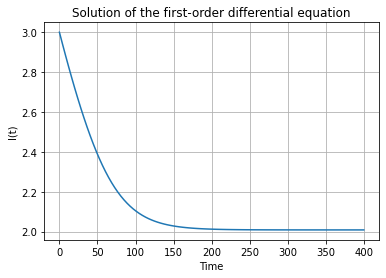

In [74]:

# Define the differential equation
def equation(l, t):
    m=np.interp(l, DataPointsDomainh1, DataPointsRangex1, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N* ((0.000792 - 0.00792*m)*(2*l + 1)/((l + 1)**2*(2*l + 3)) + (0.001584 - 0.01584*m)*(2*l + 1)/((l + 1)*(2*l + 3)**2) - (0.001584 - 0.01584*m)/((l + 1)*(2*l + 3)) - (0.0019404 - 0.019404*m)*(m - 0.1)/(2*l + 3)**2 + 0.000396*(m - 0.1)**2/(2*l + 3)**2 + 0.003564/(2*l + 3)**2)
    return dldt

# Define the initial condition
l0 = 3

# Define the time points for the solution
t = np.linspace(0, 400, 100)

# Solve the differential equation
sol1 = odeint(equation, l0, t)

# Plot the solution
plt.plot(t, sol1)
plt.xlabel('Time')
plt.ylabel('l(t)')
plt.title('Solution of the first-order differential equation')
plt.grid(True)
plt.show()

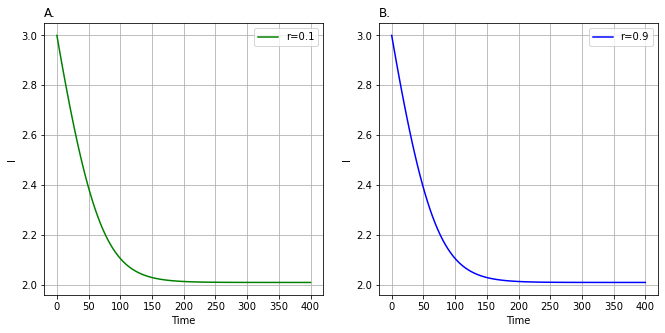

In [76]:
fig,(ax1,ax3) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(11)
#ax2 = ax1.twinx()
ax1.plot(t, sol1, label='$r=0.1$', color='green')
ax3.plot(t, sol92, label='$r=0.9$', color='blue')
ax1.legend(['r=0.1'])
ax3.legend(['r=0.9'])

ax3.set_xlabel('Time')
ax3.set_ylabel('l', color='black')

ax1.set_xlabel('Time')
ax1.set_ylabel('l', color='black')

ax1.set_title('A.',loc='left') 
ax3.set_title('B.',loc='left') 
ax1.grid(True)
ax3.grid(True)
plt.savefig("Different r Symetry.pdf")

In [78]:
f0=G(0.01, 0.75, 0,m, l, h)
f1=G(0.01, 0.75, 1,m, l, h)
df0=diff(f0,h)
df1=diff(f1,h)
print(df0)
print(df1)

0.0198*(-0.75*h - 0.375)/((h + 1)*(2*h + 3)**2) + 0.0099*(-0.75*h - 0.375)/((h + 1)**2*(2*h + 3)) - 0.0198*(0.735*m - 0.55125)/(h + l + 3)**2 + 0.00764775/(2*h + 3)**2 + 0.007425/((h + 1)*(2*h + 3))
-0.0198*(0.18375 - 0.245*m)/(h + l + 3)**2 + 0.0198*(0.25*h + 0.125)/((h + 1)*(2*h + 3)**2) + 0.0099*(0.25*h + 0.125)/((h + 1)**2*(2*h + 3)) + 0.00744975/(2*h + 3)**2 - 0.002475/((h + 1)*(2*h + 3))


In [80]:
def Df0(h,l):
    return 0.0198*(-0.75*h - 0.375)/((h + 1)*(2*h + 3)**2) + 0.0099*(-0.75*h - 0.375)/((h + 1)**2*(2*h + 3)) - 0.0198*(0.735*m - 0.55125)/(h + l + 3)**2 + 0.00764775/(2*h + 3)**2 + 0.007425/((h + 1)*(2*h + 3))
Df0(h,l)

(-0.01485*h - 0.007425)/((h + 1)*(2*h + 3)**2) + (-0.007425*h - 0.0037125)/((h + 1)**2*(2*h + 3)) - (0.014553*m - 0.01091475)/(h + l + 3)**2 + 0.00764775/(2*h + 3)**2 + 0.007425/((h + 1)*(2*h + 3))

In [82]:
def Df1(h,l):
    return -0.0198*(0.18375 - 0.245*m)/(h + l + 3)**2 + 0.0198*(0.25*h + 0.125)/((h + 1)*(2*h + 3)**2) + 0.0099*(0.25*h + 0.125)/((h + 1)**2*(2*h + 3)) + 0.00744975/(2*h + 3)**2 - 0.002475/((h + 1)*(2*h + 3))
Df1(h,l)

(0.002475*h + 0.0012375)/((h + 1)**2*(2*h + 3)) + (0.00495*h + 0.002475)/((h + 1)*(2*h + 3)**2) + (0.004851*m - 0.00363825)/(h + l + 3)**2 + 0.00744975/(2*h + 3)**2 - 0.002475/((h + 1)*(2*h + 3))

In [84]:
DF0=Df0(l,l)
DF1=Df1(l,l)

In [86]:
DF = m*Df0(l,l)+(1-m)*Df1(l,l)
print(DF)

m*((-0.01485*l - 0.007425)/((l + 1)*(2*l + 3)**2) + (-0.007425*l - 0.0037125)/((l + 1)**2*(2*l + 3)) - (0.014553*m - 0.01091475)/(2*l + 3)**2 + 0.00764775/(2*l + 3)**2 + 0.007425/((l + 1)*(2*l + 3))) + (1 - m)*((0.002475*l + 0.0012375)/((l + 1)**2*(2*l + 3)) + (0.00495*l + 0.002475)/((l + 1)*(2*l + 3)**2) + (0.004851*m - 0.00363825)/(2*l + 3)**2 + 0.00744975/(2*l + 3)**2 - 0.002475/((l + 1)*(2*l + 3)))


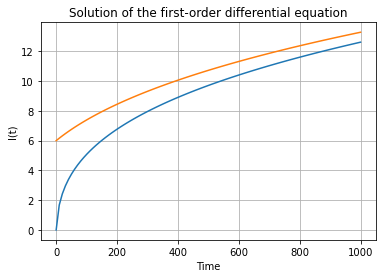

In [88]:
# Define the differential equation
def equation(l, t):
    m=np.interp(l, DataPointsDomainh3, DataPointsRangex3, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N* (m*((-0.01485*l - 0.007425)/((l + 1)*(2*l + 3)**2) + (-0.007425*l - 0.0037125)/((l + 1)**2*(2*l + 3)) - (0.014553*m - 0.01091475)/(2*l + 3)**2 + 0.00764775/(2*l + 3)**2 + 0.007425/((l + 1)*(2*l + 3))) + (1 - m)*((0.002475*l + 0.0012375)/((l + 1)**2*(2*l + 3)) + (0.00495*l + 0.002475)/((l + 1)*(2*l + 3)**2) + (0.004851*m - 0.00363825)/(2*l + 3)**2 + 0.00744975/(2*l + 3)**2 - 0.002475/((l + 1)*(2*l + 3))))
    return dldt

# Define the initial condition
l0 = 0
l02 = 6

# Define the time points for the solution
t = np.linspace(0, 1000, 100)

# Solve the differential equation
sol71 = odeint(equation, l0, t)
sol72 = odeint(equation, l02, t)

# Plot the solution
plt.plot(t, sol71)
plt.plot(t, sol72)
plt.xlabel('Time')
plt.ylabel('l(t)')
plt.title('Solution of the first-order differential equation')
plt.grid(True)
plt.show()

In [90]:
conda install nbconvert

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
jupyter nbconvert --evolution_l.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1000, 100)


# Tracé des fonctions

plt.plot(t, sol71, label='$l_0=0$', color='red')
plt.plot(t, sol72, label='$l_0=6$', color='green')


# Légendes et titre
plt.legend()
plt.xlabel(r'time $t$')
plt.ylabel(r'$\vartheta_l$')
plt.title(r'Mutation rate evolution $\vartheta_l$')

# Afficher le graphique
plt.grid(True)
plt.savefig("Different l_02.pdf")
plt.show()

In [ ]:
f09=G(0.01, 0.9, 0,m, l, h)
f19=G(0.01, 0.9, 1,m, l, h)
df09=diff(f09,h)
df19=diff(f19,h)
#print(df09)
print(df19)

In [ ]:
def Df09(h,l):
    return  0.0198*(-1.44*h - 0.72)/((h + 1)*(2*h + 3)**2) + 0.0099*(-1.44*h - 0.72)/((h + 1)**2*(2*h + 3)) - 0.0198*(0.882*m - 0.7938)/(h + l + 3)**2 + 0.00388476/(2*h + 3)**2 + 0.014256/((h + 1)*(2*h + 3))

def Df19(h,l):
    return  -0.0198*(0.0882 - 0.098*m)/(h + l + 3)**2 + 0.0198*(0.16*h + 0.08)/((h + 1)*(2*h + 3)**2) + 0.0099*(0.16*h + 0.08)/((h + 1)**2*(2*h + 3)) + 0.00356796/(2*h + 3)**2 - 0.001584/((h + 1)*(2*h + 3))

In [ ]:
DF09=Df09(l,l)
DF19=Df19(l,l)
DF9 = (1-m)*Df09(l,l)+m*Df19(l,l)
print(DF9)

In [ ]:
# Define the differential equation
def equation(l, t):
    m=np.interp(l, DataPointsDomainh5, DataPointsRangex5, left=None, right=None, period=None)
    # Define the derivative dy/dt
    dldt = 1/2 *N*(m*((0.001584*l + 0.000792)/((l + 1)**2*(2*l + 3)) + (0.003168*l + 0.001584)/((l + 1)*(2*l + 3)**2) + (0.0019404*m - 0.00174636)/(2*l + 3)**2 + 0.00356796/(2*l + 3)**2 - 0.001584/((l + 1)*(2*l + 3))) + (1 - m)*((-0.028512*l - 0.014256)/((l + 1)*(2*l + 3)**2) + (-0.014256*l - 0.007128)/((l + 1)**2*(2*l + 3)) - (0.0174636*m - 0.01571724)/(2*l + 3)**2 + 0.00388476/(2*l + 3)**2 + 0.014256/((l + 1)*(2*l + 3))))
    return dldt

# Define the initial condition
l0911 = 0
l0922 = 3
l0933 = 5

# Define the time points for the solution
t = np.linspace(0, 500, 100)

# Solve the differential equation
sol911 = odeint(equation, l0911, t)
sol922 = odeint(equation, l0922, t)
sol933 = odeint(equation, l0933, t)


# Plot the solution
plt.plot(t, sol911, label='$l_0=0$', color='green')
plt.plot(t, sol922, label='$l_0=3$', color='blue')
plt.plot(t, sol933, label='$l_0=5$', color='red')
plt.xlabel('Time  (t)')
plt.ylabel('l(t)')
plt.title('Evolution of mutation rate ')
plt.grid(True)
plt.savefig("REMARK.pdf")
plt.show()
